In [78]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Understanding the Variables

In [79]:
df = pd.read_csv("../data/raw/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.shape

(1338, 7)

In [12]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [6]:
df.nunique(axis=0)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.region.unique().tolist()

['southwest', 'southeast', 'northwest', 'northeast']

In [23]:
df.smoker.unique().tolist()


['yes', 'no']

In [22]:
df.sex.unique().tolist()

['female', 'male']

In [43]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [44]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [42]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [97]:
df.groupby('region')['children'].mean()

region
northeast    1.046296
northwest    1.147692
southeast    1.049451
southwest    1.141538
Name: children, dtype: float64

In [98]:
df.groupby('sex').count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


# 2. Cleaning the data

In [95]:
df_drop = df.drop(columns=['bmi', 'charges'])
df_drop

,age,sex,children,smoker,region
0,19,female,0,yes,southwest
1,18,male,1,no,southeast
2,28,male,3,no,southeast
3,33,male,0,no,northwest
4,32,male,0,no,northwest
...,...,...,...,...,...
1333,50,male,3,no,northwest
1334,18,female,0,no,northeast
1335,18,female,0,no,southeast
1336,21,female,0,no,southwest


In [36]:
df_drop.isnull()

,age,sex,children,smoker,region
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1333,False,False,False,False,False
1334,False,False,False,False,False
1335,False,False,False,False,False
1336,False,False,False,False,False


In [37]:
df_drop.dropna(axis=0)

,age,sex,children,smoker,region
0,19,female,0,yes,southwest
1,18,male,1,no,southeast
2,28,male,3,no,southeast
3,33,male,0,no,northwest
4,32,male,0,no,northwest
...,...,...,...,...,...
1333,50,male,3,no,northwest
1334,18,female,0,no,northeast
1335,18,female,0,no,southeast
1336,21,female,0,no,southwest


In [38]:
df_drop.shape

(1338, 5)

# 3. Exploring relationships in the data

C:\Users\david\AppData\Local\Temp\ipykernel_31440\3619987536.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_drop.corr()


<AxesSubplot:>

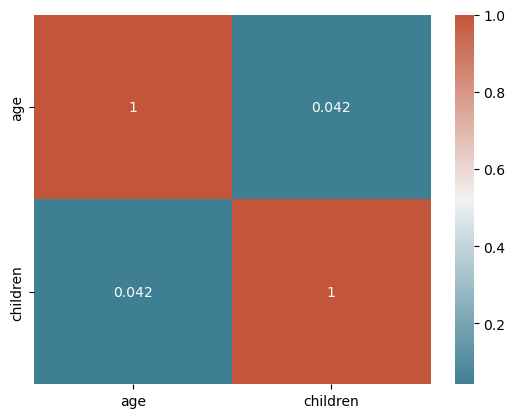

In [39]:
corr = df_drop.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

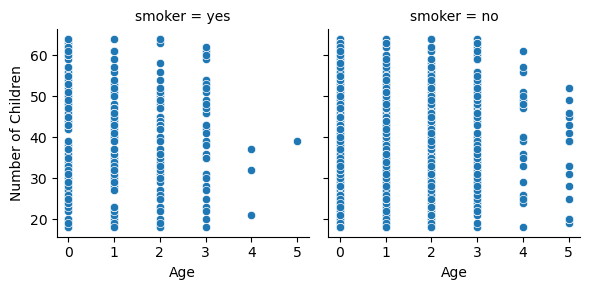

In [26]:
g = sns.FacetGrid(data=df_drop, col="smoker",col_wrap=2)
g.map(sns.scatterplot, "children", "age").set(ylabel="Number of Children",xlabel="Age")

In [34]:
df_groupby=df_drop.groupby('sex').mean().reset_index()
df_groupby

C:\Users\david\AppData\Local\Temp\ipykernel_31440\3307332774.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby=df_drop.groupby('sex').mean().reset_index()


,sex,age,children
0,female,39.503021,1.074018
1,male,38.917160,1.115385


In [32]:
df_groupby=df_drop.groupby('children').mean().reset_index()
df_groupby

C:\Users\david\AppData\Local\Temp\ipykernel_31440\3706586135.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby=df_drop.groupby('children').mean().reset_index()


,children,age
0,0,38.444251
1,1,39.453704
2,2,39.445833
3,3,41.566879
4,4,39.000000
5,5,35.611111


In [33]:
df_groupby=df_drop.groupby('age').mean().reset_index()
df_groupby

C:\Users\david\AppData\Local\Temp\ipykernel_31440\2308472880.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupby=df_drop.groupby('age').mean().reset_index()


,age,children
0,18,0.449275
1,19,0.426471
2,20,0.862069
3,21,0.785714
4,22,0.714286
5,23,1.000000
6,24,0.464286
7,25,1.285714
8,26,1.071429
9,27,0.964286


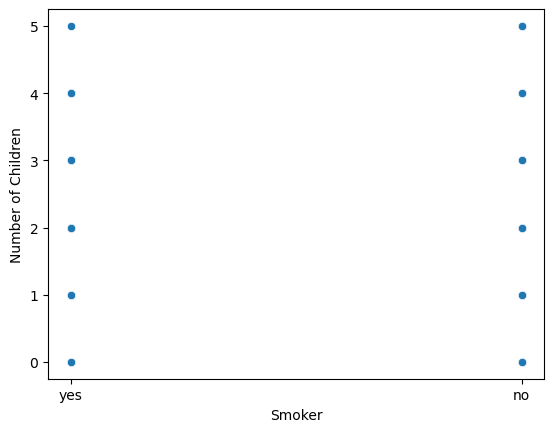

In [45]:
sns.scatterplot(x='smoker', y='children', data=df_drop)
plt.xlabel('Smoker')
plt.ylabel('Number of Children')
plt.show()

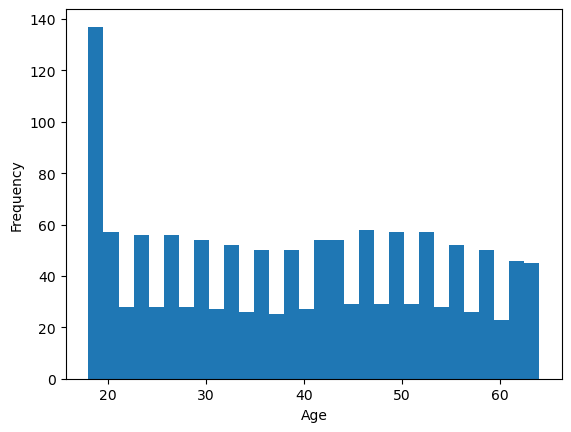

In [68]:
plt.hist(df['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

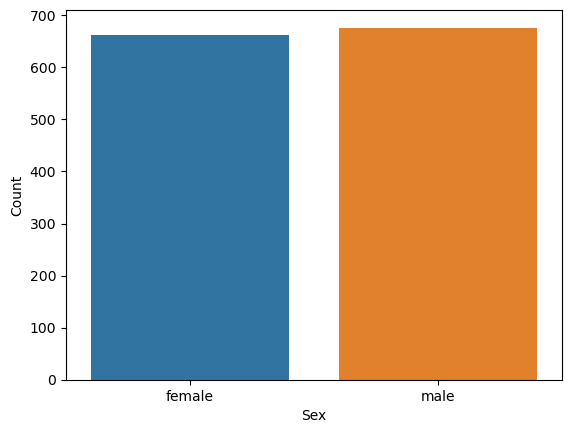

In [60]:
sns.countplot(x='sex', data=df_drop)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

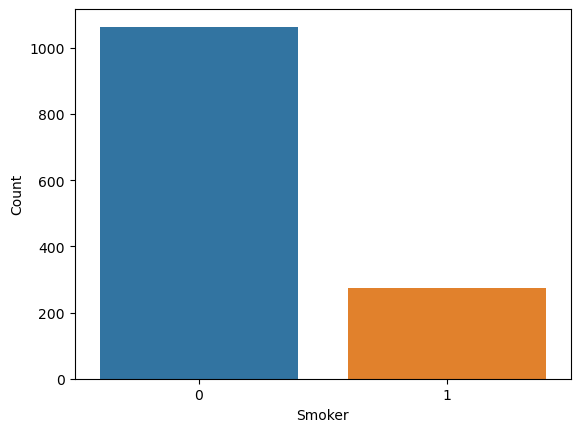

In [49]:
sns.countplot(x='smoker', data=df_drop)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

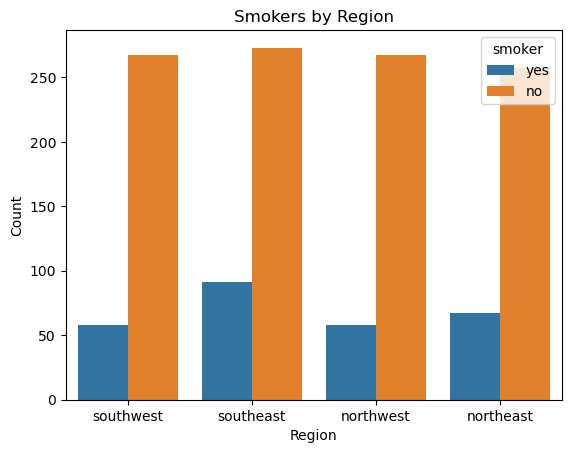

In [81]:
sns.countplot(x='region', hue='smoker', data=df_drop)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Smokers by Region')
plt.show()

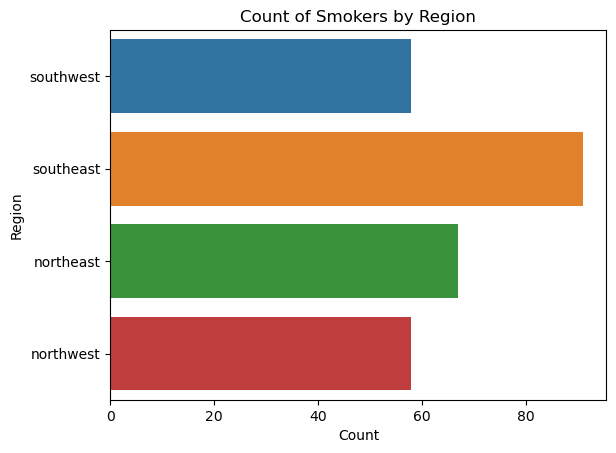

In [82]:
smokers = df_drop[df_drop['smoker'] == 'yes']
sns.countplot(y='region', data=smokers)
plt.title('Count of Smokers by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()


In [56]:
smoker_children = df_drop.groupby('smoker')['children'].mean()
smoker_children

smoker
0    1.090226
1    1.113139
Name: children, dtype: float64

Text(0.5, 1.0, 'Average Number of Children for Smokers and Non-Smokers')

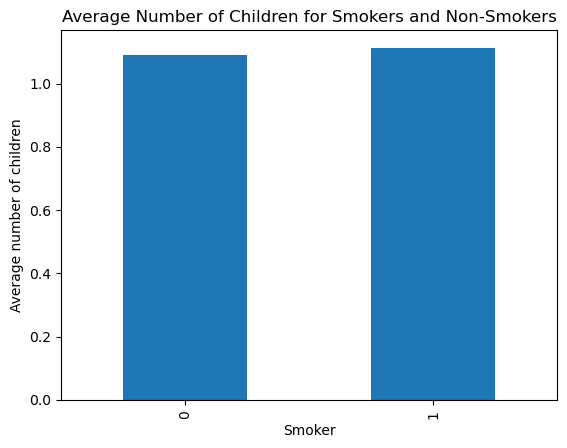

In [57]:
smoker_children.plot(kind='bar')
plt.xlabel('Smoker')
plt.ylabel('Average number of children')
plt.title('Average Number of Children for Smokers and Non-Smokers')

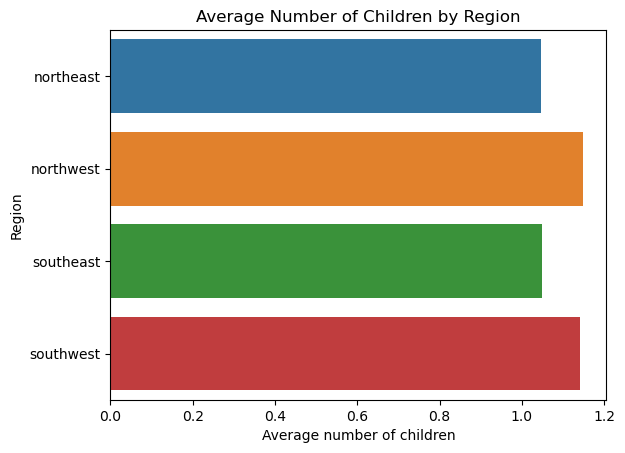

In [83]:
avg_children_by_region = df_drop.groupby('region')['children'].mean()
sns.barplot(x=avg_children_by_region.values, y=avg_children_by_region.index)
plt.xlabel('Average number of children')
plt.ylabel('Region')
plt.title('Average Number of Children by Region')
plt.show()

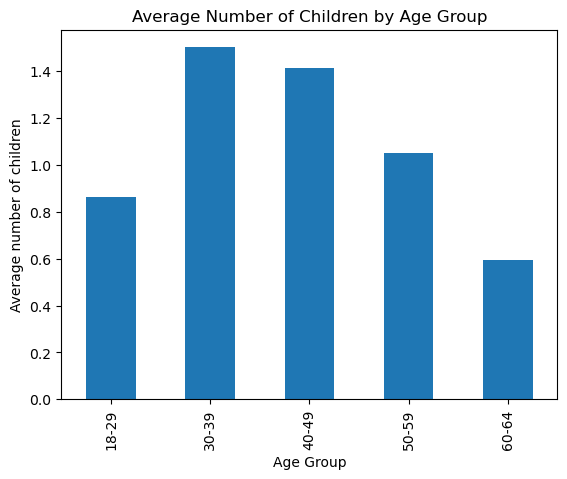

In [96]:

df_drop['age_group'] = pd.cut(df_drop['age'], bins=[18, 29, 39, 49, 59, 64], labels=['18-29', '30-39', '40-49', '50-59', '60-64'])
avg_children_by_age_group = df_drop.groupby('age_group')['children'].mean()

avg_children_by_age_group.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average number of children')
plt.title('Average Number of Children by Age Group')
plt.show()


# 4. Conclusions

Here are a few interesting things that the data has begun to reveal.

1. In the dataset, there is a high frequency of people under the age of 20.  The mean age is 39, with the lowest being 18 and the highest being 64.
1. There is a correlation between a person's age and their likelihood to have children.  But when graphed out, we see that the 30-39 year old age group has the largest number of children and it decreases from there. The mean number of children for the dataset is 1.01.
1. There are far more smokers than non smokers in the data set.  On average, smokers have slightly more children. The most smokers are located in the southeast.  
1. The dataset is almost equally split among the four regions, but not quite.
1. The northeast has the largest average of children
